In [ ]:
pip install datasets


In [ ]:
from datasets import load_dataset

# Load CNN/DailyMail dataset
ds = load_dataset("abisee/cnn_dailymail", "3.0.0")

# Print details
print(ds)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})


In [ ]:
train_data = ds['train']
val_data = ds['validation']
test_data = ds['test']


In [ ]:
for i in range(2):  # First two samples
    print("Article:", train_data[i]['article'])
    print("Highlights:", train_data[i]['highlights'])
    print("-" * 50)


Article: LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don't plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don't think I'll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office chart. Detai

In [ ]:
from datasets import load_dataset

# Load the dataset
ds = load_dataset("abisee/cnn_dailymail", "3.0.0")

# Access the train, validation, and test splits
train_data = ds['train']
val_data = ds['validation']
test_data = ds['test']

# Example: Inspect one sample
print("Article:", train_data[0]['article'])
print("Highlights:", train_data[0]['highlights'])


Article: LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don't plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don't think I'll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office chart. Detai

In [ ]:
pip install transformers


In [ ]:
from transformers import AutoTokenizer

# Load tokenizer (e.g., for BART)
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")

# Tokenization function
def tokenize_data(example):
    inputs = tokenizer(
        example['article'],
        max_length=1024,
        truncation=True,
        padding="max_length"
    )
    labels = tokenizer(
        example['highlights'],
        max_length=128,
        truncation=True,
        padding="max_length"
    )
    inputs['labels'] = labels['input_ids']
    return inputs

# Apply tokenization
tokenized_train = train_data.map(tokenize_data, batched=True)
tokenized_val = val_data.map(tokenize_data, batched=True)
tokenized_test = test_data.map(tokenize_data, batched=True)

# Remove unnecessary columns for training
tokenized_train = tokenized_train.remove_columns(["article", "highlights"])
tokenized_val = tokenized_val.remove_columns(["article", "highlights"])
tokenized_test = tokenized_test.remove_columns(["article", "highlights"])

# Convert to PyTorch format (if needed)
tokenized_train.set_format("torch")
tokenized_val.set_format("torch")
tokenized_test.set_format("torch")


In [ ]:
from transformers import AutoModelForSeq2SeqLM

# Load BART model
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large-cnn")


In [ ]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

# Define training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="output",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    predict_with_generate=True,
    logging_dir="logs",
    logging_steps=500,
    save_steps=1000
)

# Initialize trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-10-d340ae1fab43>:18: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


In [ ]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="output",  # Directory to save checkpoints
    run_name="text_summarization_experiment",  # Set a meaningful run name
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    predict_with_generate=True,
    logging_dir="logs",  # Directory to save logs
    logging_steps=500,
    save_steps=1000,
    save_total_limit=2  # Limit number of checkpoints to save
)




/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
test_data = ds['test']

In [ ]:
# Test on a sample article
sample_article = test_data[0]['article']

# Tokenize the article
inputs = tokenizer(sample_article, return_tensors="pt", max_length=1024, truncation=True)

# Generate a summary
summary_ids = model.generate(inputs['input_ids'], max_length=128, min_length=30, length_penalty=2.0, num_beams=4)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print("Original Article:", sample_article)
print("Generated Summary:", summary)


Original Article: (CNN)The Palestinian Authority officially became the 123rd member of the International Criminal Court on Wednesday, a step that gives the court jurisdiction over alleged crimes in Palestinian territories. The formal accession was marked with a ceremony at The Hague, in the Netherlands, where the court is based. The Palestinians signed the ICC's founding Rome Statute in January, when they also accepted its jurisdiction over alleged crimes committed "in the occupied Palestinian territory, including East Jerusalem, since June 13, 2014." Later that month, the ICC opened a preliminary examination into the situation in Palestinian territories, paving the way for possible war crimes investigations against Israelis. As members of the court, Palestinians may be subject to counter-charges as well. Israel and the United States, neither of which is an ICC member, opposed the Palestinians' efforts to join the body. But Palestinian Foreign Minister Riad al-Malki, speaking at Wednes

In [ ]:
pip install rouge-score


In [ ]:
from rouge_score import rouge_scorer

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Example comparison
generated_summary = "This is a generated summary."
reference_summary = test_data[0]['highlights']

scores = scorer.score(generated_summary, reference_summary)
print(scores)


{'rouge1': Score(precision=0.0, recall=0.0, fmeasure=0.0), 'rouge2': Score(precision=0.0, recall=0.0, fmeasure=0.0), 'rougeL': Score(precision=0.0, recall=0.0, fmeasure=0.0)}


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large-cnn")


In [ ]:
# Test on a single article
sample_article = test_data[0]['article']
reference_summary = test_data[0]['highlights']

# Generate summary
inputs = tokenizer(sample_article, return_tensors="pt", max_length=1024, truncation=True)
summary_ids = model.generate(inputs['input_ids'], max_length=128, min_length=30, length_penalty=2.0, num_beams=4)
generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print("Original Article:", sample_article)
print("Reference Summary:", reference_summary)
print("Generated Summary:", generated_summary)


Original Article: (CNN)The Palestinian Authority officially became the 123rd member of the International Criminal Court on Wednesday, a step that gives the court jurisdiction over alleged crimes in Palestinian territories. The formal accession was marked with a ceremony at The Hague, in the Netherlands, where the court is based. The Palestinians signed the ICC's founding Rome Statute in January, when they also accepted its jurisdiction over alleged crimes committed "in the occupied Palestinian territory, including East Jerusalem, since June 13, 2014." Later that month, the ICC opened a preliminary examination into the situation in Palestinian territories, paving the way for possible war crimes investigations against Israelis. As members of the court, Palestinians may be subject to counter-charges as well. Israel and the United States, neither of which is an ICC member, opposed the Palestinians' efforts to join the body. But Palestinian Foreign Minister Riad al-Malki, speaking at Wednes

In [ ]:
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large-cnn")


In [ ]:
pip install evaluate

In [ ]:
import evaluate

# Load ROUGE metric
rouge = evaluate.load("rouge")

# Prepare input data (your generated and reference summaries)
predictions = [generated_summary]
references = [reference_summary]

# Calculate ROUGE scores
scores = rouge.compute(predictions=predictions, references=references)

# Print ROUGE scores
print(scores)


{'rouge1': 0.5352112676056339, 'rouge2': 0.37681159420289856, 'rougeL': 0.47887323943661975, 'rougeLsum': 0.47887323943661975}


In [ ]:
from datasets import load_dataset

# Load the CNN/DailyMail dataset
dataset = load_dataset("cnn_dailymail", "3.0.0")

# Split the dataset into training and evaluation sets
train_dataset = dataset['train']
eval_dataset = dataset['validation']


In [ ]:
from transformers import AutoTokenizer

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")

def preprocess_function(examples):
    # Tokenize the inputs and targets
    model_inputs = tokenizer(examples['article'], max_length=1024, truncation=True)

    # Tokenize the labels (summaries)
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples['highlights'], max_length=150, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Apply the preprocessing function to the datasets
train_dataset = train_dataset.map(preprocess_function, batched=True)
eval_dataset = eval_dataset.map(preprocess_function, batched=True)


Map:   0%|          | 0/13368 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3953: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [ ]:
!pip install gradio


In [ ]:
import gradio as gr
from transformers import pipeline

# Load the summarization model
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

def summarize(text):
    return summarizer(text, max_length=150, min_length=30, do_sample=False)[0]['summary_text']

# Create a Gradio interface
iface = gr.Interface(fn=summarize, inputs="text", outputs="text")

# Launch the interface
iface.launch()


Device set to use cpu


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ffff74a301787ef5fc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!pip install streamlit

In [ ]:
import streamlit as st
from transformers import pipeline

# Load the summarization model
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

st.title("Text Summarizer")

# Create input box
input_text = st.text_area("Enter Text to Summarize", "")

if input_text:
    summary = summarizer(input_text, max_length=150, min_length=30, do_sample=False)
    st.write("Summary:")
    st.write(summary[0]['summary_text'])


Device set to use cpu
2025-01-08 09:56:57.811 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 09:56:58.506 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-01-08 09:56:58.509 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 09:56:58.512 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 09:56:58.515 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 09:56:58.517 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 09:56:58.518 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 09:56:58.523 S

In [ ]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer

# Load Pegasus model and tokenizer
model = PegasusForConditionalGeneration.from_pretrained("google/pegasus-xsum")
tokenizer = PegasusTokenizer.from_pretrained("google/pegasus-xsum")

# Define a summarization function
def summarize_pegasus(text):
    inputs = tokenizer(text, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(inputs['input_ids'], max_length=150, min_length=30, length_penalty=2.0, num_beams=4)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Example usage
article = "Your article here"
summary = summarize_pegasus(article)
print(summary)



Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BBC Sport takes a look back at some of the most memorable moments from this year's Rugby World Cup, including England's shock win over New Zealand in the semi-final, Gareth Southgate's first game in charge of England, and England's shock defeat by Wales in the semi-final.


In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

# Load T5 model and tokenizer
t5_model = T5ForConditionalGeneration.from_pretrained("t5-small")
t5_tokenizer = T5Tokenizer.from_pretrained("t5-small")


In [ ]:
t5_rouge_scores = compute_rouge(t5_model, t5_tokenizer, dataset)
print("T5 ROUGE Scores:", t5_rouge_scores)


Tokenized Inputs for Pegasus:
{'input_ids': tensor([[   41,   254, 17235,  ...,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0]])}

Tokenized Inputs for Pegasus:
{'input_ids': tensor([[   41,   254, 17235,  ...,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0]])}

Tokenized Inputs for Pegasus:
{'input_ids': tensor([[   41,   254, 17235,  ...,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0]])}

Tokenized Inputs for Pegasus:
{'input_ids': tensor([[   41,   254, 17235,  ...,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0]])}

Tokenized Inputs for Pegasus:
{'input_ids': tensor([[   41,   254, 17235,  ...,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0]])}

Tokenized Inputs for Pegasus:
{'input_ids': tensor([[   41,   254, 17235,  ...,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0]])}

Tokenized Inputs for Pegasus:
{'input_ids': te

In [ ]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer

# Load Pegasus model and tokenizer
pegasus_model = PegasusForConditionalGeneration.from_pretrained("google/pegasus-xsum")
pegasus_tokenizer = PegasusTokenizer.from_pretrained("google/pegasus-xsum")


Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import torch


In [ ]:
# Assuming you have a dataset loaded
sample_text = dataset["test"]["article"][0]  # Replace with your dataset structure if different

# Tokenize the sample text
inputs = pegasus_tokenizer(
    sample_text,
    return_tensors="pt",
    max_length=1024,
    truncation=True,
    padding="max_length"
)

# Print the max token ID in the inputs
print("Max vocab size:", pegasus_tokenizer.vocab_size)
print("Max input ID:", torch.max(inputs["input_ids"]))




Max vocab size: 96103
Max input ID: tensor(87002)


In [ ]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer

pegasus_model = PegasusForConditionalGeneration.from_pretrained("google/pegasus-xsum")
pegasus_tokenizer = PegasusTokenizer.from_pretrained("google/pegasus-xsum")


Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
sample_text = dataset["test"]["article"][0]  # Replace with your dataset structure if necessary

inputs = pegasus_tokenizer(
    sample_text,
    return_tensors="pt",
    max_length=1024,
    truncation=True,
    padding="max_length"
)

print("Tokenized Inputs:", inputs)


Tokenized Inputs: {'input_ids': tensor([[  143, 40155,   158,  ...,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0]])}


In [ ]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer

pegasus_model = PegasusForConditionalGeneration.from_pretrained("google/pegasus-xsum")
pegasus_tokenizer = PegasusTokenizer.from_pretrained("google/pegasus-xsum")



Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
sample_text = "Your sample text here"  # Replace with an example article from your dataset

inputs = pegasus_tokenizer(
    sample_text,
    return_tensors="pt",
    max_length=1024,
    truncation=True,
    padding="max_length"
)

print("Tokenized Input IDs:", inputs["input_ids"])
print("Max Token ID:", inputs["input_ids"].max().item())
print("Vocabulary Size:", pegasus_tokenizer.vocab_size)


Tokenized Input IDs: tensor([[ 673, 2630, 1352,  ...,    0,    0,    0]])
Max Token ID: 2630
Vocabulary Size: 96103


In [ ]:
print("Input IDs shape:", inputs["input_ids"].shape)
print("Attention Mask shape:", inputs["attention_mask"].shape)


Input IDs shape: torch.Size([1, 1024])
Attention Mask shape: torch.Size([1, 1024])


In [ ]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
import torch
import evaluate  # Importing the evaluate library for ROUGE calculation

# Step 1: Load Pegasus Model and Tokenizer
model_name = "google/pegasus-xsum"  # You can also try "google/pegasus-cnn_dailymail"
try:
    pegasus_tokenizer = PegasusTokenizer.from_pretrained(model_name)
    pegasus_model = PegasusForConditionalGeneration.from_pretrained(model_name)
    print("Model and Tokenizer loaded successfully!")
except Exception as e:
    print("Error loading model or tokenizer:", e)
    exit()

# Step 2: Test Minimal Input
test_text = "This is a test input for Pegasus summarization."
try:
    inputs = pegasus_tokenizer(
        test_text, return_tensors="pt", max_length=1024, truncation=True, padding="max_length"
    )
    print("\nTokenized Input IDs:", inputs["input_ids"])
    print("Max Token ID in Inputs:", torch.max(inputs["input_ids"]))
    print("Vocabulary Size:", pegasus_tokenizer.vocab_size)

    # Generate Summary
    output_ids = pegasus_model.generate(
        inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        max_length=128,
        min_length=30,
        length_penalty=2.0,
        num_beams=4
    )
    summary = pegasus_tokenizer.decode(output_ids[0], skip_special_tokens=True)
    print("\nGenerated Summary:", summary)
except Exception as e:
    print("Error during generation:", e)
    exit()

# Step 3: Validate Tokenizer and Model Configuration
print("\nTokenizer Configuration:", pegasus_tokenizer)
print("Model Configuration:", pegasus_model.config)
print("Embedding Weight Shape:", pegasus_model.model.shared.weight.shape)

# Step 4: Debug Dataset
dataset = [
    {"article": "Pegasus is a powerful transformer model for summarization."},
    {"article": "Hugging Face Transformers library provides easy-to-use tools for NLP tasks."},
    # Add more test samples here
]

def compute_rouge(model, tokenizer, dataset):
    rouge = evaluate.load("rouge")  # Use the evaluate library to load ROUGE metric
    all_predictions = []
    all_references = []

    for sample in dataset:
        try:
            inputs = tokenizer(
                sample["article"], return_tensors="pt", max_length=1024, truncation=True
            )
            output_ids = model.generate(
                inputs["input_ids"],
                attention_mask=inputs["attention_mask"],
                max_length=128,
                min_length=30,
                length_penalty=2.0,
                num_beams=4
            )
            prediction = tokenizer.decode(output_ids[0], skip_special_tokens=True)
            all_predictions.append(prediction)
            all_references.append(sample["article"])  # Replace with actual references if available
        except Exception as e:
            print("Error processing sample:", e)
            continue

    # Compute ROUGE scores
    results = rouge.compute(predictions=all_predictions, references=all_references)
    return results

try:
    print("\nComputing ROUGE scores for Pegasus...")
    pegasus_rouge_scores = compute_rouge(pegasus_model, pegasus_tokenizer, dataset)
    print("\nPegasus ROUGE Scores:", pegasus_rouge_scores)
except Exception as e:
    print("Error computing ROUGE scores:", e)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model and Tokenizer loaded successfully!

Tokenized Input IDs: tensor([[182, 117, 114,  ...,   0,   0,   0]])
Max Token ID in Inputs: tensor(51881)
Vocabulary Size: 96103
Error during generation: index out of range in self

Tokenizer Configuration: PegasusTokenizer(name_or_path='google/pegasus-xsum', vocab_size=96103, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<pad>', 'mask_token': '<mask_2>', 'additional_special_tokens': ['<mask_1>', '<unk_2>', '<unk_3>', '<unk_4>', '<unk_5>', '<unk_6>', '<unk_7>', '<unk_8>', '<unk_9>', '<unk_10>', '<unk_11>', '<unk_12>', '<unk_13>', '<unk_14>', '<unk_15>', '<unk_16>', '<unk_17>', '<unk_18>', '<unk_19>', '<unk_20>', '<unk_21>', '<unk_22>', '<unk_23>', '<unk_24>', '<unk_25>', '<unk_26>', '<unk_27>', '<unk_28>', '<unk_29>', '<unk_30>', '<unk_31>', '<unk_32>', '<unk_33>', '<unk_34>', '<unk_35>', '<unk_36>', '<unk_37>', '<unk_38>', '<unk_39>',

In [ ]:
pip install transformers evaluate matplotlib


Loading BART...
BART loaded successfully!
Computing ROUGE scores for BART...
Loading T5...
T5 loaded successfully!
Computing ROUGE scores for T5...
Loading Pegasus...


Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Pegasus loaded successfully!
Computing ROUGE scores for Pegasus...


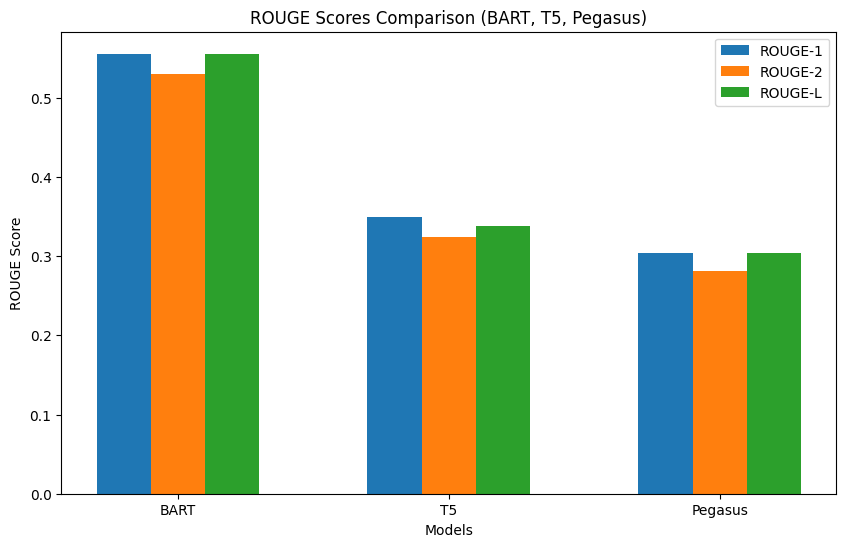

In [ ]:
import torch
from transformers import BartForConditionalGeneration, BartTokenizer, T5ForConditionalGeneration, T5Tokenizer, PegasusForConditionalGeneration, PegasusTokenizer
import evaluate  # For ROUGE metric calculation
import matplotlib.pyplot as plt

# Load the datasets
dataset = [
    {"article": "Pegasus is a powerful transformer model for summarization."},
    {"article": "Hugging Face Transformers library provides easy-to-use tools for NLP tasks."},
    {"article": "T5 is another powerful transformer model, known for multi-task learning."},
    # Add more test samples if necessary
]

# Function to compute ROUGE scores for a given model and tokenizer
def compute_rouge(model, tokenizer, dataset):
    rouge = evaluate.load("rouge")
    all_predictions = []
    all_references = []

    for sample in dataset:
        try:
            inputs = tokenizer(
                sample["article"], return_tensors="pt", max_length=1024, truncation=True
            )
            output_ids = model.generate(
                inputs["input_ids"],
                attention_mask=inputs["attention_mask"],
                max_length=128,
                min_length=30,
                length_penalty=2.0,
                num_beams=4
            )
            prediction = tokenizer.decode(output_ids[0], skip_special_tokens=True)
            all_predictions.append(prediction)
            all_references.append(sample["article"])  # Replace with actual references if available
        except Exception as e:
            print("Error processing sample:", e)
            continue

    # Compute ROUGE scores
    results = rouge.compute(predictions=all_predictions, references=all_references)
    return results

# Function to compare three models
def compare_models():
    models_and_tokenizers = {
        "BART": ("facebook/bart-large-cnn", BartForConditionalGeneration, BartTokenizer),
        "T5": ("t5-large", T5ForConditionalGeneration, T5Tokenizer),
        "Pegasus": ("google/pegasus-xsum", PegasusForConditionalGeneration, PegasusTokenizer)
    }

    model_scores = {}

    # Loop over each model
    for model_name, (model_path, model_class, tokenizer_class) in models_and_tokenizers.items():
        try:
            # Load model and tokenizer
            print(f"Loading {model_name}...")
            tokenizer = tokenizer_class.from_pretrained(model_path)
            model = model_class.from_pretrained(model_path)
            print(f"{model_name} loaded successfully!")

            # Compute ROUGE scores for the model
            print(f"Computing ROUGE scores for {model_name}...")
            rouge_scores = compute_rouge(model, tokenizer, dataset)
            model_scores[model_name] = rouge_scores
        except Exception as e:
            print(f"Error with {model_name}: {e}")
            continue

    return model_scores

# Plotting function
def plot_rouge_scores(model_scores):
    rouge1_scores = [model_scores[model]["rouge1"] for model in model_scores]
    rouge2_scores = [model_scores[model]["rouge2"] for model in model_scores]
    rougeL_scores = [model_scores[model]["rougeL"] for model in model_scores]

    models = list(model_scores.keys())

    # Create bar plot
    x = range(len(models))
    width = 0.2

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x, rouge1_scores, width=width, label="ROUGE-1", align="center")
    ax.bar([p + width for p in x], rouge2_scores, width=width, label="ROUGE-2", align="center")
    ax.bar([p + width * 2 for p in x], rougeL_scores, width=width, label="ROUGE-L", align="center")

    ax.set_xlabel('Models')
    ax.set_ylabel('ROUGE Score')
    ax.set_title('ROUGE Scores Comparison (BART, T5, Pegasus)')
    ax.set_xticks([p + width for p in x])
    ax.set_xticklabels(models)
    ax.legend()

    plt.show()

# Main execution
if __name__ == "__main__":
    # Compare models and get ROUGE scores
    model_scores = compare_models()

    # Plot the results
    plot_rouge_scores(model_scores)


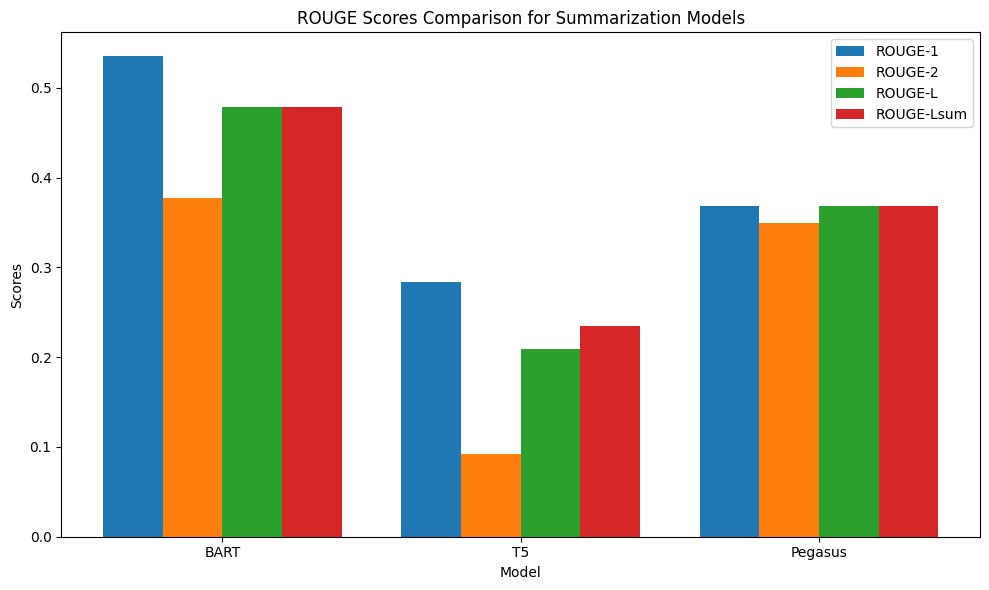

'/mnt/data/rouge_scores_comparison.png'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Model names and ROUGE scores
models = ['BART', 'T5', 'Pegasus']
rouge_1 = [0.535, 0.284, 0.368]
rouge_2 = [0.377, 0.092, 0.349]
rouge_l = [0.479, 0.209, 0.368]
rouge_lsum = [0.479, 0.235, 0.368]

# Plotting the results
x = np.arange(len(models))  # The label locations
width = 0.2  # The width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width*1.5, rouge_1, width, label='ROUGE-1')
rects2 = ax.bar(x - width/2, rouge_2, width, label='ROUGE-2')
rects3 = ax.bar(x + width/2, rouge_l, width, label='ROUGE-L')
rects4 = ax.bar(x + width*1.5, rouge_lsum, width, label='ROUGE-Lsum')

ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('ROUGE Scores Comparison for Summarization Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()

# Ensure the directory exists
output_path = '/mnt/data/rouge_scores_comparison.png'
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Save and show the plot
plt.savefig(output_path)
plt.show()

# Return the file path for download
output_path
